In [1]:
import pandas as pd
import numpy as np

In [2]:
path='Data/all_codas.csv'

In [3]:
df = pd.read_csv(path)
df = df.set_index('codaNUM2018')
df = df.drop('Unnamed: 0', axis=1)

/tmp/ipykernel_155145/2077074637.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## Overwiev of the dataset

In [5]:
print('The dataset consists of ' + str(df.shape[0]) + ' audio files \n')
print('Each file is described by ' + str(df.shape[1]) + ' columns of metadata \n \n')
df.head()

The dataset consists of 8878 audio files 

Each file is described by 97 columns of metadata 
 



,REC,nClicks,Duration,ICI1,ICI2,ICI3,ICI4,ICI5,ICI6,ICI7,...,IPI31,IPI32,IPI33,IPI34,IPI35,IPI36,IPI37,IPI38,IPI39,IPI40
codaNUM2018,,,,,,,,,,,,,,,,,,,,,
1,2005-03040406_processed441stereo-ATW-SNOW-FRUI...,5,1.188,0.293,0.282,0.298,0.315,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03040406_processed441stereo-ATW-SNOW-FRUI...,5,1.125,0.287,0.265,0.299,0.274,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-03040406_processed441stereo-ATW-SNOW-FRUI...,5,1.090,0.264,0.253,0.297,0.276,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-03040406_processed441stereo-ATW-SNOW-FRUI...,5,1.090,0.269,0.265,0.271,0.285,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-03040406_processed441stereo-ATW-SNOW-FRUI...,5,1.101,0.273,0.267,0.266,0.295,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### REC column
The name of the audio file.

The data come from different datasets.
The first 4930 rows contain data recorded previosly to 2010 and the name is in the format "2010-DOM20100228_0004-ROUNDER-ATW-SLBC-LADYO-LOCALF".
Those data contain very few metadata and it seems they were not tagging the specific whale that was producing sound but the generic group of whales they were recording.

Data from row 4931 contains more metadata and the file are named in this format: swDDDa001_nnnn

sw = sperm whale

DDD = Julian day of the year (==number of days from January 1) of the recording

a,b,c,d.. = the tag order on the day

nnnn=the Dtag breaks up the audio files into WAV files of limited size so 001 if the first file from tag on time, 002 is the next.

In [5]:
df.REC.unique()[:10]

array(['2005-03040406_processed441stereo-ATW-SNOW-FRUIT-SOUR',
       '2008-Dom20080325_131726-HANDMAID-ATW', '2009-FEB5-000-FRUIT-SOUR',
       '2010-DOM_20100120_153413-ROUNDER-LOCALF-SLBC',
       '2010-DOM_20100120_162149-ATW-SLBC-ROUNDER',
       '2010-DOM_20100120_163504-ATW-SLBC-ROUNDER',
       '2010-DOM_20100120_175002-FRUIT-SOUR',
       '2010-DOM_20100120_175150-FRUIT-SOUR',
       '2010-DOM20100225_0001-FRUIT-CRAKE-SOURSOP',
       '2010-DOM20100228_0004-ROUNDER-ATW-SLBC-LADYO-LOCALF'],
      dtype=object)

In [6]:
df.REC.unique()[-10:]

array(['sw133b002_8905', 'sw133b002_9421', 'sw133b002_9467',
       'sw133b002_9531', 'sw133b003_16255', 'sw134a001_10',
       'sw134a001_319', 'sw134a001_372', 'sw134a001_407', 'sw134a001_458'],
      dtype=object)

In [7]:
print('The total number of recording sessions is '+str(len(df.REC.unique())))

The total number of recording sessions is 437


## Columns description

- nClicks = number of clicks in the file
- Duration = total duration of the file (seconds)

## Duration

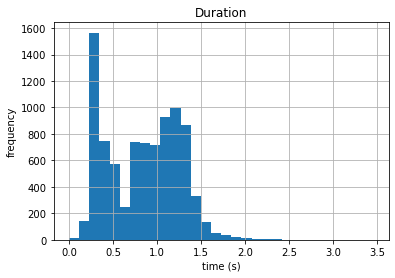

In [15]:
duration = df.Duration
ax = duration.hist(bins=30)
ax.set_title('Duration')
ax.set_xlabel('time (s)')
ax.set_ylabel('frequency');

- ICIx = inter click interval between click x and click x+1
- ELKI2 and ELKI2name some index and name of the coda types, the convetion used is not clear, only present for the old data (first half of the dataset)

In [16]:
df.Unit.unique()

array(['A', 'D', 'F', 'J', 'N', 'R', 'T', 'U', 'V', 'P', 'K', 'S', 'ZZZ'],
      dtype=object)

In [17]:
df.UnitNum.unique()

array([ 1,  2,  3,  4,  6,  8, 10, 11, 12,  7,  5,  9, 13])

- Unit and UnitNum = they seem to indicate the group of whales (according to which definition of group?), in fact same units contain recording of the same individual whales.
- IDN = not clear, it seems related to the name of the whale, but this column contains a lot of 0 value

In [24]:
df.IDN.value_counts()[:10]

0       5391
0        419
5586     407
5151     346
5722     300
5560     286
5727     216
5979     157
5561     136
5978     136
Name: IDN, dtype: int64

- Date = date of the recording
- TagOnTime = Time of placement of tag

- Name = Name of the 'speaking' whale
- Bout = Index of the 'dialogue'? Is is a progressive number for the same whale and the same recording session.
- Whale = ?? It's an integer, but there is no one-to-one correspondence with the whale name
- Coda = Consecutive number of the coda in the series (bouts??)

- TsTo =  Time Since Tag On. This is a count of seconds from when the tag activated in salt water. It is continuous across serial wav files (explanation from automated anno.docx)
- Tag = tag identifier
- Focal = 1 if coda is spoken by tagged whale. 0 otherwise
- IPIx = Inter pulse interval (ms)

## Questions

1. Each row is a coda? (big variation in number of clicks)
2. How did you extracted clicks
3. What is TagOnTime
4. what is bout, series
5. What is a tag?